#Motivation
Welcome to my final project for CMSC422! When trying to figure out what field of study I wanted to pursue for this project, I realized that I wanted to create something that can perhaps help others down the road. Over the last 20 years, suicide rates have gone up around 35%. To me, self-love and mental well-being are two of the most important things in our lives. 

I was surfing through Kaggle for almost two hours when I found the World Happiness Report dataset–I immediately knew this is what I wanted to use for my project. The World Happiness Report is a publication containing rankings of happiness per country based on respondent ratings of their own lives. My goal here is to try to gain insight into what creates happiness in our lives through data. I will be using data from the reports of 2015-2019. 

I will begin by exploring the data first to see if I can find any patterns, then use machine learning techniques to learn what the most important features are and use these to learn to accurately predict happiness.

#The Dataset
###Features used in the World Happiness Report
1) GDP per capita

2) Social life quality of citizens

3) Health of citizens

4) Freedom of citizens

5) Generosity of citizens

6) Trust in government of citizens

##Dystopia
Dystopia is the most unfavorable country–it's a made-up country with the lowest income,  lowest life expectancy, lowest generosity, most corrupotion, least freedom, and least social support. It is used as a benchmark in which all countries can be favorably compared in the six key varaiables–it's called "Dystopia" since it would contain the least happiness.


#Set Up
Below are the packages I will be using:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
whr2015 = pd.read_csv(path+'/2015.csv')
whr2016 = pd.read_csv(path+'/2016.csv')
whr2017 = pd.read_csv(path+'/2017.csv')
whr2018 = pd.read_csv(path+'/2018.csv')
whr2019 = pd.read_csv(path+'/2019.csv')

#Cleaning the Data
Although the datasets contain features that mean the same thing, how they are named slightly differ, so I am going to rename features so that they are the same across all dataframes. This will make it possible to combine all 5 dataframes into one larger dataframe containing the years   2015-2019.

In [ ]:
whr2015.drop(columns = ['Region', 'Happiness Rank', 'Standard Error'], inplace = True)
whr2015.rename(columns={'Economy (GDP per Capita)':'GDP per Capita', 'Family':'Social Support',
 'Health (Life Expectancy)':'Life Expectancy', 'Trust (Government Corruption)':'Perception of Government Corruption',}, inplace=True)
whr2015['Year'] = 2015
whr2015 = whr2015[['Country', 'Year', 'Happiness Score', 'GDP per Capita', 'Social Support',
 'Life Expectancy', 'Freedom', 'Generosity','Perception of Government Corruption',
  'Dystopia Residual']]


whr2016.drop(columns = ['Region', 'Happiness Rank', 'Lower Confidence Interval',
 'Upper Confidence Interval'], inplace = True)
whr2016.rename(columns={'Economy (GDP per Capita)':'GDP per Capita', 'Family':'Social Support',
 'Health (Life Expectancy)':'Life Expectancy', 'Trust (Government Corruption)':'Perception of Government Corruption',}, inplace=True)
whr2016 = whr2016[['Country', 'Happiness Score', 'GDP per Capita', 'Social Support',
 'Life Expectancy', 'Freedom', 'Generosity','Perception of Government Corruption',
  'Dystopia Residual']]
whr2016['Year'] = 2016
whr2016 = whr2016[['Country', 'Year', 'Happiness Score', 'GDP per Capita', 'Social Support',
 'Life Expectancy', 'Freedom', 'Generosity','Perception of Government Corruption',
  'Dystopia Residual']]


whr2017.drop(columns = ['Happiness.Rank', 'Whisker.high', 'Whisker.low'], inplace = True)
whr2017.rename(columns={'Happiness.Score':'Happiness Score', 'Economy..GDP.per.Capita.':'GDP per Capita', 'Family':'Social Support',
 'Health..Life.Expectancy.':'Life Expectancy', 'Trust..Government.Corruption.':'Perception of Government Corruption',
 'Dystopia.Residual':'Dystopia Residual'}, inplace=True)
whr2017['Year'] = 2017
whr2017 = whr2017[['Country', 'Year', 'Happiness Score', 'GDP per Capita', 'Social Support',
 'Life Expectancy', 'Freedom', 'Generosity','Perception of Government Corruption',
  'Dystopia Residual']]


whr2018.drop(columns = ['Overall rank'], inplace = True)
# Since the 2018 table doesn't have a dystopia residual column, I will insert the column
# with a value of -1 since the values are never negative-->for efficiently identifying
# later down the line. I will do the same with 2019.
whr2018['Dystopia.Residual'] = -1
whr2018.rename(columns={'Country or region':'Country', 'Score':'Happiness Score', 'GDP per capita':'GDP per Capita', 'Social support':'Social Support',
 'Healthy life expectancy':'Life Expectancy', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Perception of Government Corruption',
'Dystopia.Residual':'Dystopia Residual'}, inplace=True)
whr2018['Year'] = 2018
whr2018 = whr2018[['Country', 'Year', 'Happiness Score', 'GDP per Capita', 'Social Support',
 'Life Expectancy', 'Freedom', 'Generosity','Perception of Government Corruption',
  'Dystopia Residual']]


whr2019.drop(columns = ['Overall rank'], inplace = True)
whr2019['Dystopia.Residual'] = -1
whr2019.rename(columns={'Country or region':'Country', 'Score':'Happiness Score', 'GDP per capita':'GDP per Capita', 'Social support':'Social Support',
 'Healthy life expectancy':'Life Expectancy', 'Freedom to make life choices':'Freedom', 'Perceptions of corruption':'Perception of Government Corruption',
'Dystopia.Residual':'Dystopia Residual'}, inplace=True)
whr2019['Year'] = 2019
whr2019 = whr2019[['Country', 'Year', 'Happiness Score', 'GDP per Capita', 'Social Support',
 'Life Expectancy', 'Freedom', 'Generosity','Perception of Government Corruption',
  'Dystopia Residual']]

<ipython-input-3-57bdea37e892>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whr2016['Year'] = 2016


In [ ]:
## Make sure all tables are perfectly formatted the same way
str(whr2015.columns.values) == str(whr2016.columns.values) == str(whr2017.columns.values) == str(whr2018.columns.values) == str(whr2019.columns.values)

True

In [ ]:
# Now, I can finally combine all 5 tables
df = pd.concat([whr2015, whr2016, whr2017, whr2018, whr2019], axis=0)
# Sort based on country and so all countries appear next to each other in 
# chronological order
df.sort_values(by=['Country', 'Year'], inplace = True)
df.dropna(inplace=True)
df.head()

,Country,Year,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Generosity,Perception of Government Corruption,Dystopia Residual
152,Afghanistan,2015,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,1.952100
153,Afghanistan,2016,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2.145580
140,Afghanistan,2017,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,2.150801
144,Afghanistan,2018,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,-1.000000
153,Afghanistan,2019,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,-1.000000


#Exploratory Data Analysis

Now that we have the data all sorted out, let's check out the correlationn between the main features and happiness outcome. I will do this through a scatter plot.

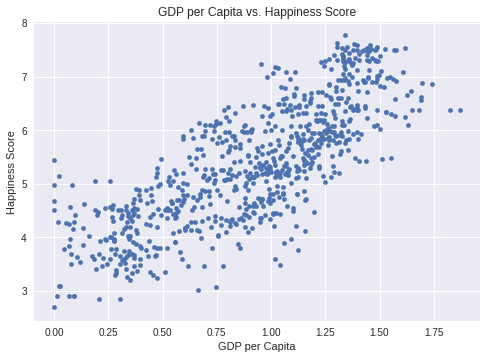

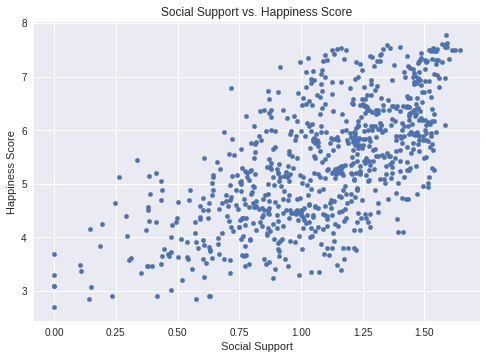

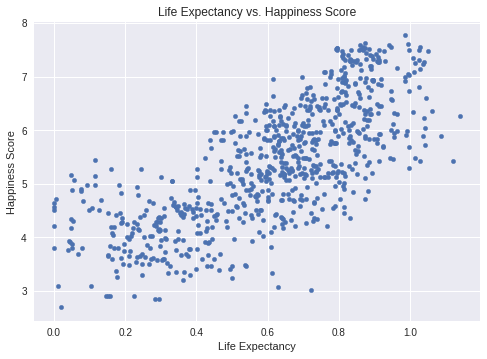

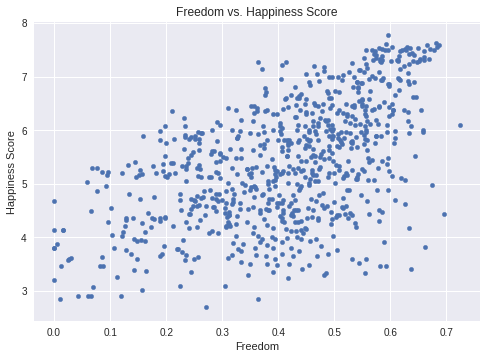

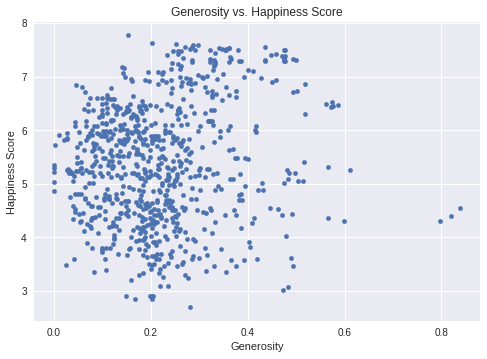

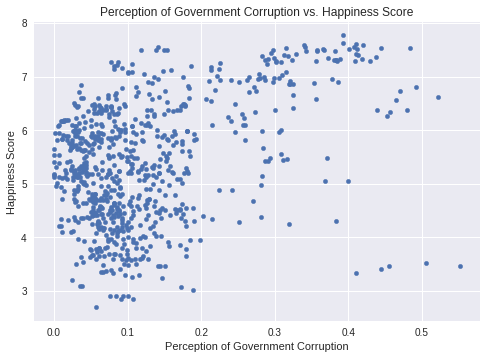

In [ ]:
cols = ['GDP per Capita', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Perception of Government Corruption']
for colname in cols:
    g = df.plot.scatter(x=colname, y ='Happiness Score', title=f'{colname} vs. Happiness Score')

Interesting. According to these plots, GDP per capitaa, social support, life expectancy and freedom strongly correlate with happiness. 

Money may not buy happiness but financial stability is a huge goal in our lives, and having it relieves us of lots of stress. 

I expected social support to have a strong link with happiness, as I believe our relationships are the most important things in our lives. Social interaction is a a huge source of joy in our lives–we cannot underestimate the importance of spending quality time with our friends and family. 

Although government corruption is a real issue, it seems to not have much of an effect on general happiness.

Now, let's see how these factors compare with each other in a a correlation matrix so we can have a more acurrate idea of what has the strongest link with happiness.

[Text(0, 0.5, 'Year'),
 Text(0, 1.5, 'Happiness Score'),
 Text(0, 2.5, 'GDP per Capita'),
 Text(0, 3.5, 'Social Support'),
 Text(0, 4.5, 'Life Expectancy'),
 Text(0, 5.5, 'Freedom'),
 Text(0, 6.5, 'Generosity'),
 Text(0, 7.5, 'Perception of Government Corruption'),
 Text(0, 8.5, 'Dystopia Residual')]

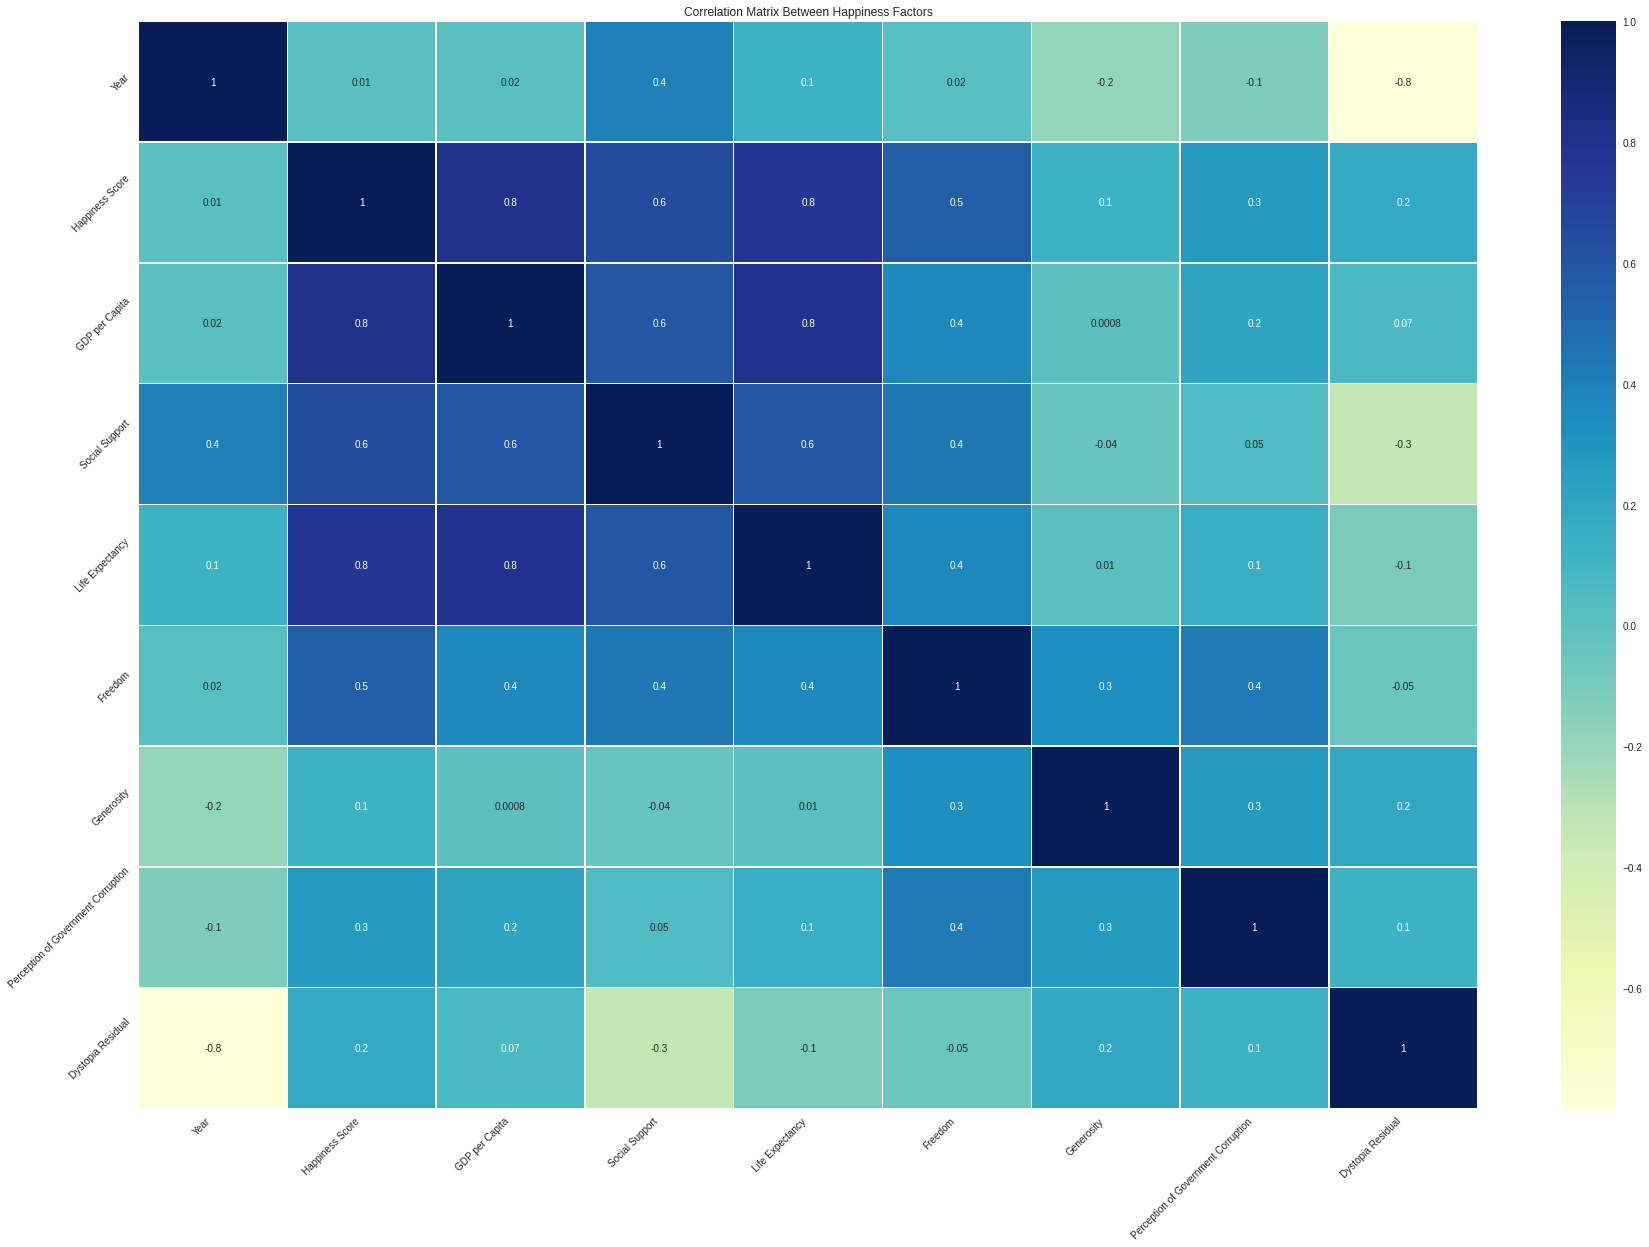

In [ ]:
plt.subplots(figsize = (30, 20))
g = sns.heatmap(df.corr("spearman"), annot = True, cmap = "YlGnBu", 
                fmt = '.1g', linewidths=.5,)

g.set_title('Correlation Matrix Between Happiness Factors')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

Just what I suspected. The corellationn matrix confirms that the happiness scores are most strongly linked to GDP per capita, social support, freedom, and life expectancy. 

# Machine Learning

I plan to take a deeper dive into the importance of the features we've investigated so far. Also, I hope to be able to predict with accuracy an expected happiness score given those features. 

I will be building a linear regression model from scratch that will be able to accurately predict happiness scores. Then, I will evaluate how accurate this model performs and analyze what the results mean. 

## Linear Regression

I chose to use a linear regression model for the machine learning portion because during the exploratory data analysis, it seemed as though there could be a line of best fit for most of the scatter plots I built. I was initially going to use the sklearn modules for linear regression, but for the spirit of the project, I've decided to instead build the model from scratch myself! I will walk you through the code explaining each part.

First, let's split the dataframe into our X and Y for the linear regression model to be built:

In [ ]:
X = np.array(df.drop(columns = ["Happiness Score", "Country", "Year"]))
X = np.hstack((np.ones((X.shape[0],1)), X))
Y = np.array(df["Happiness Score"])

###Hypothesis
The hypothesis function's purpose is to define an apporoximate way to calculate the output–the predicted happiness score in this case. 

In the hypothesis function, the xs are each feature in the X matrix, while the thetas are the hyperparameters to learn to build the most accurate model on the data.

The function is usually of the form hθ(x) = θ0 + θ1x1 + ... + θnxn. In this case, theta will be w, or the weights of each feature

This may look slightly different in the code, as I'm using matrix multiplication to get the same result:

In [ ]:
def hypothesis_func(X, w):
  return np.matmul(X, w)

###Loss Function
The loss function is essential for machine learning problems. Without them, we wouldn't have a way to evaluate how well the model performs. 

One of the most commmon loss functions is mean squared error, or MSE. 

It is calculated by subtracting the actual value (y) from the predicted value (h(x, theta)) and squaring the result. This is done for all y values, and the average is taken for all of these differences, i.e. sum up all y-h(x,theta), summing them up, then dividing by the size of the dataset.

In [ ]:
def mse(X, Y, w):
  n = len(Y)
  Yhat = hypothesis_func(X, w)
  return np.dot(Y - Yhat, Y - Yhat)/n

###Gradient Descent

Gradient descent is an optimization algorithm designed to find the local minima/maxima of a function. Here, we want to optimize by minimizing the error/loss. 

Note that I decide to keep track of the calculated cost function from each step. This is not necessary in determining the final result, however it will be a useful tool for analyzing how well our model did after we run it. 

I'm also choosing to return the predicted (Yhat) values, as these are the values predicted by the model, and I'd like to compare how accurate these values are to the actual happiness scores.

In [ ]:
def gd(X, Y, w, eta, k):
  n = X.shape[0]
  cost_funcs = []
  predicted_values = []
  for _ in range(k):
    Yhat = hypothesis_func(X, w)
    predicted_values.append(Yhat)
    gradient = (1/n)*(X.T@(Yhat - Y))
    w = w - (eta)*gradient
    cost_funcs.append(mse(X, Y, w))

  
  return w, cost_funcs, predicted_values[-1][:, -1].reshape(781, 1)

###Normalization
We're finally ready to begin using the linear classifier we've built. Often times, at this point we'd normalize the data, which changes the values of features in the dataset to use a common scale, without losing information. However, for this specific dataset, normalization is not needed. This is because all features are per-capita of the countries, so all features are a value between 0 and 1 anyways.

###It's Showtime.
We're finally ready to deploy the linear model we've built. First, I will initialize the weights as zeros, define my step size (eta) and number of iterations to run in my gradient descent function. 

In [ ]:
w = np.zeros((X.shape[1], 1))
eta = 0.1
k = 30
w, cost_funcs, predicted_values = gd(X, Y, w, eta, k)

##Testing Our Model

Phew. After hours of building the model and being faced with more runtime errors than I care to admit, our model finally ran with no errors! That is an achievement in itself, however, we must test how well it did. A model that runs without errors is by no means a model that performs well.

I will analyze how our model performed in 2 ways: calculating model accuracy, then finding how fast the model converges. Second, I will plot how the cost functions calculated in the gradient descent function. Not only do we want an accurate model, but also one that performs quickly.

At each step, I will test our gradient descent algorithm using different values of step size and number of iterations, or epochs. This is to see how our parameters affect the way our model behaves.

In [ ]:
# smaller step size
w2 = np.zeros((X.shape[1], 1))
eta2 = 0.01
k2 = 75
w2, cost_funcs2, predicted_values2 = gd(X, Y, w2, eta2, k2)
# larger step size
w3 = np.zeros((X.shape[1], 1))
eta3 = 0.3
k3 = 20
w3, cost_funcs3, predicted_values3 = gd(X, Y, w3, eta3, k3)

# even smaller step size
w4 = np.zeros((X.shape[1], 1))
eta4 = 0.001
k4 = 100
w4, cost_funcs4, predicted_values4 = gd(X, Y, w4, eta4, k4)

# even larger step size
w5 = np.zeros((X.shape[1], 1))
eta5 = 0.6
k5 = 20
w5, cost_funcs5, predicted_values5 = gd(X, Y, w5, eta5, k5)


###Calculating Accuracy

First, I will determine the accuracy by calculating the root mean squared error of each prediction vs acual happiness scores. Why root mean squared error instead of mean squared error? Mean squared error is great, since it helps avoid any negative values. However, squaring the prediction - actual will give us a number that's too high. By square rooting, we will have the average of how much each prediction was off by. Let's start off by defining a root mean squared error function:

In [ ]:
import math

def rmse(Y, Yhat):
  n = len(Y)
  sum = 0
  for i in range(n):
    sum += (Yhat[i] - Y[i])**2

  return math.sqrt(sum/n)

In [ ]:
# rmse using original predicted values
rmse(Y, predicted_values)

1.963974682133047

In [ ]:
# rmse using predicted values calculated with a smaller step size in gradient descent
rmse(Y, predicted_values2)

2.18043729122643

In [ ]:
rmse(Y, predicted_values4)

4.2283383079867525

In [ ]:
# rmse using predicted values calculated with a larger step size in gradient descent
rmse(Y, predicted_values3)

1.96506470077208

In [ ]:
rmse(Y, predicted_values5)

2557352.6341895494

###Analysis:

The results here are quite interesting. I did not expect the predictions would be less accurate when running running the gradient descent with a smaller step size. To be sure, I tried running gradient descent with an even smaller step size. The result was a drastically worse root mean square error (2.18 to 4.23 rmse). At first I was incredibly confused. Why would a smaller step size yield a less accurate result? I believed that having a smaller step size would do the exact opposite. After much deliberation, I inferred that the reason for this may be that a smaller step size could potentially make the algorithm more prone to tiny dips in the function. So, we can converge on a tiny local minima that we otherwise would have jumped over using a slightly smaller step size. I am not 100% sure I am correct but to me this seems like the only plausible explanation.

A step size of 0.1-0.3 seems like the sweet spot in this case, and a larger step size of 0.3 gave us basically the same accuracy but slighly worse. However a much larger step size of 0.6 gave us a comically incorrect result, with a rmse of 2,557,352.63. 



In [ ]:
def get_costs_curve(cost_funcs, k):
  ks = np.array([i for i in range(len(cost_funcs))])
  costs = np.array([i[0][0] for i in cost_funcs])

  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.plot(ks, costs)
  plt.show()

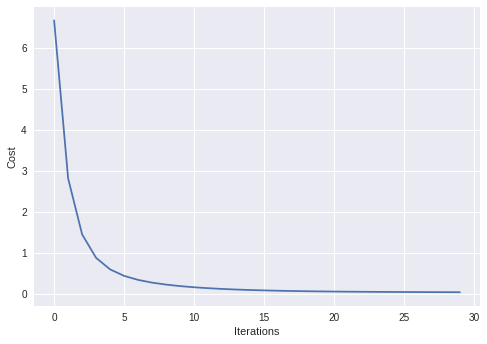

In [ ]:
# original step size
get_costs_curve(cost_funcs, k)

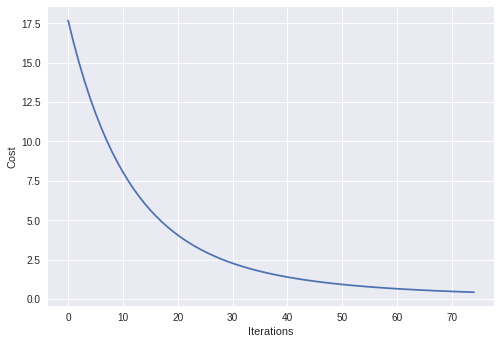

In [ ]:
# smaller step size
get_costs_curve(cost_funcs2, k2)

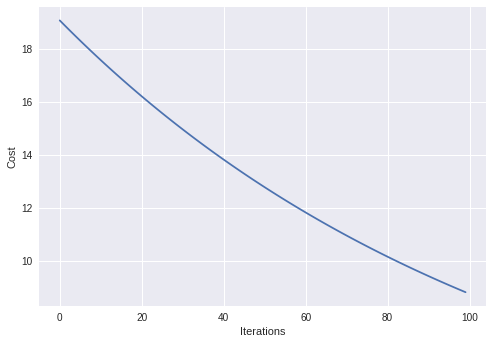

In [ ]:
# even smaller step size
get_costs_curve(cost_funcs4, k4)

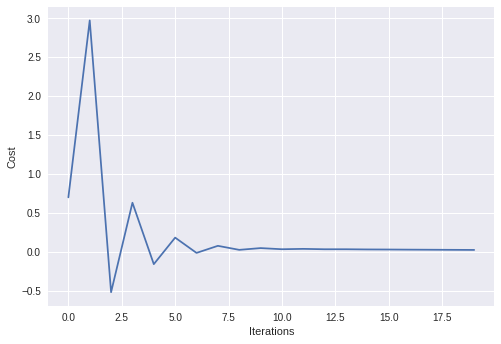

In [ ]:
# larger step size
get_costs_curve(cost_funcs3, k3)

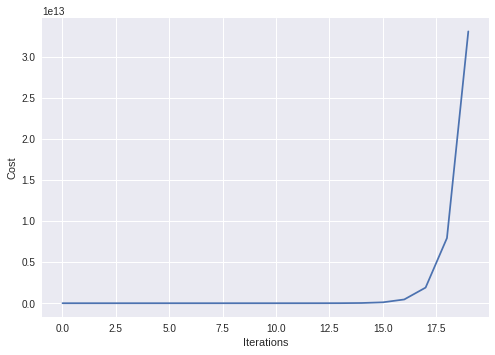

In [ ]:
# larger step size
get_costs_curve(cost_funcs5, k5)

###Analysis:
This result is along the lines of what I expected. Costs decreasing after each iteration and eventually converging to almost zero means that our gradient descent algorithm must be working. Lower costs mean lower errors and that's the exact goal of gradient descent. 


Once again, it seems as though using a step size at around 0.1 is the sweet spot. We converged within 20 or so iterations (epochs), and anything after, we aren't really gaining much.

For the step size of 0.01, gradient descent takes almost 3 times as long to converge to zero. This far from ideal, since a longer running algorithm eats up precious resources. Using an even smaller step size of 0.001 causes the algorithm to converge after more than 100 epochs. 


On the other hand, using a step size of 0.3 results in a wonky looking graph, with cost bouncing between poisitive and negative values for the first few iterations. This is because a step size that's too large will jump past a local minima in the cost function. It will continue jumping back and forth until the minima is finally found. 

Lastly, using the largest step size of 0.6 results in costs actually INCREASING instead of decreasing over time. Using such a large step size here is really to have as a benchmark to compare to the others, obviously this is not recommended.

#Closing Remarks

This project was incredibly fun to do. It was quite the challenge challenge building a linear regression model from scratch–there were multiple times I wanted to give up (or break my computer) out of frustration. But, I'm glad I perservered, as doing so was a great learning experience.